In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 17075 (delta 18), reused 5 (delta 5), pack-reused 17049 (from 3)
Receiving objects: 100% (17075/17075), 15.70 MiB | 15.16 MiB/s, done.
Resolving deltas: 100% (11719/11719), done.
/content/yolov5


In [2]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 15.7 MB/s eta 0:00:00


In [3]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 0s (727 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [4]:
pip install pdf2image

In [5]:
api=""
import google.generativeai as genai
import PIL.Image

genai.configure(api_key=api)

model = genai.GenerativeModel('gemini-1.5-pro')


In [18]:
from pdf2image import convert_from_path
from PIL import Image
import numpy as np
import cv2
import os
import torch
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

class Circuit_Extraction:
  def __init__(self,best_weights_path):
    self.pdf_file = None
    self.output_folder = None
    self.model = torch.hub.load('ultralytics/yolov5', 'custom', path=best_weights_path,force_reload=True)

  def get_circuit(self,img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = self.model(img)
    detections = results.xyxy[0]
    results.show()

  def analyze_image(self,image):
    prompt = "Give me parameters of all given ICs(integrated circuit) from given IC company which is given in page heading"
    response = model.generate_content([image, prompt])
    response_text = response.text.strip()
    clean_text = response_text.replace("**", "")
    clean_text = response_text.replace("*", "")
    return clean_text

  def get_all_circuit(self,pdf_file,output_folder):

    print(f"Converting {pdf_file} to images...")
    images = convert_from_path(pdf_file)

    for page_num, image in enumerate(images, start=1):
        if(page_num==1):
          try:
            result=self.analyze_image(image)
            print(result)
          except Exception as e:
            print(f"An error occurred: {e}")
        image_np = np.array(image)

        image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

        results = self.model(image_bgr)
        detections = results.xyxy[0]
        detections = [box for box in detections if box[5] == 0]

        if len(detections) > 0:
            print(f"Circuits detected on page {page_num}.")

            for idx, box in enumerate(detections):
                x1, y1, x2, y2 = map(int, box[:4].tolist())
                cropped_image = image_bgr[y1:y2, x1:x2]
                cropped_with_boundary = cropped_image.copy()
                cv2.rectangle(cropped_with_boundary, (0, 0), (cropped_image.shape[1] - 1, cropped_image.shape[0] - 1), (0, 0, 0), 2)
                cropped_with_boundary_pil = Image.fromarray(cv2.cvtColor(cropped_with_boundary, cv2.COLOR_BGR2RGB))
                print(f"Displaying cropped image for page {page_num}, circuit {idx + 1}:")
                display(cropped_with_boundary_pil)

                cropped_filename = os.path.join(output_folder, f'page_{page_num}_circuit_{idx + 1}.png')
                cropped_with_boundary_pil.save(cropped_filename)


    print("Processing completed!")


In [19]:
best_weights_path='/content/best.pt'
CE=Circuit_Extraction(best_weights_path)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-12-22 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


**Test Datasheet 1**

Converting /content/ncs2.pdf to images...
The datasheet lists the following parameters for the NCS2016x and NCV2016x family of op-amps:

General Parameters:

 Gain-Bandwidth Product: 8 MHz
 Quiescent Current (per channel): 500 µA typical (V<sub>S</sub> = 5.5 V)
 Input Offset Voltage: ±0.3 mV
 Supply Voltage Range: 1.8 V to 5.5 V
 Operating Temperature Range: -40°C to +125°C
 Input and Output: Rail-to-Rail
 Stability: Unity Gain Stable
 AEC-Q100 Qualified:  NCV prefix denotes automotive qualification.  NCS parts are not automotive qualified.
 Environmental: Pb-Free, Halogen Free/BFR Free, RoHS Compliant

Available Packages:

 SC70-5:  CASE 419A (Single)
 TSOP-5/SOT23-5: CASE 483 (Single)
 Micro8/MSOP8: CASE 846A (Single)
 SOIC-8: CASE 751 (Dual or Quad - Datasheet does not specify if there are specific dual/quad part numbers, so this may be application specific)
 TSSOP-14: CASE 948G (Dual or Quad - Same applies as the SOIC-8)
 SOIC-14: CASE 751A (Dual or Quad - Same applies as the SOIC-

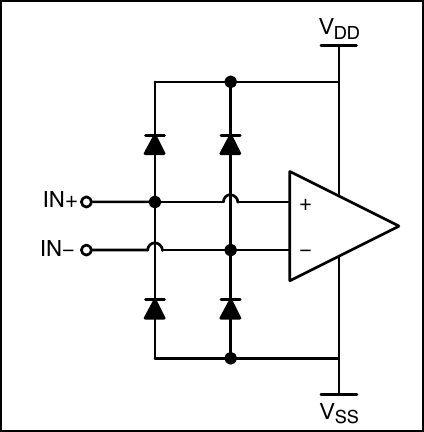

Displaying cropped image for page 14, circuit 2:


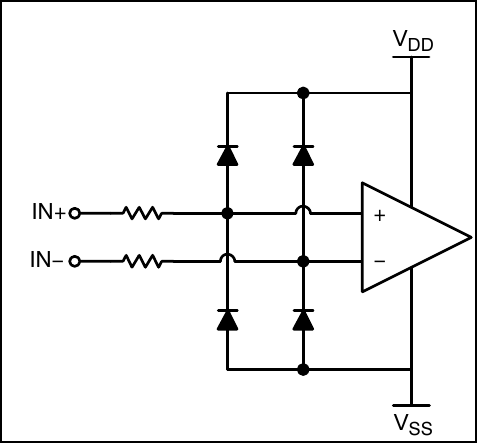

Displaying cropped image for page 14, circuit 3:


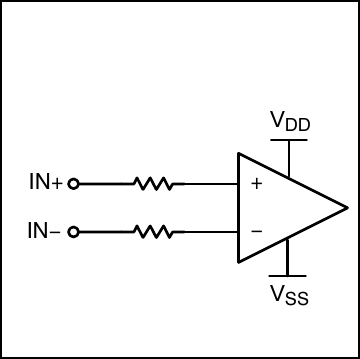

Circuits detected on page 15.
Displaying cropped image for page 15, circuit 1:


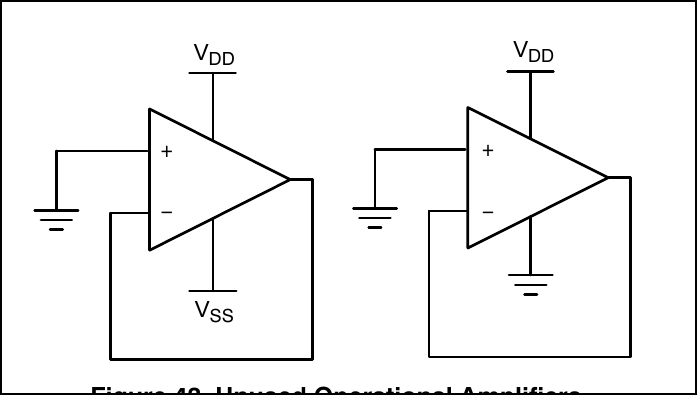

Displaying cropped image for page 15, circuit 2:


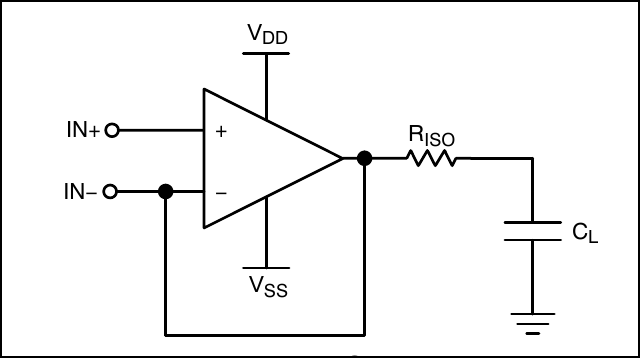

Displaying cropped image for page 15, circuit 3:


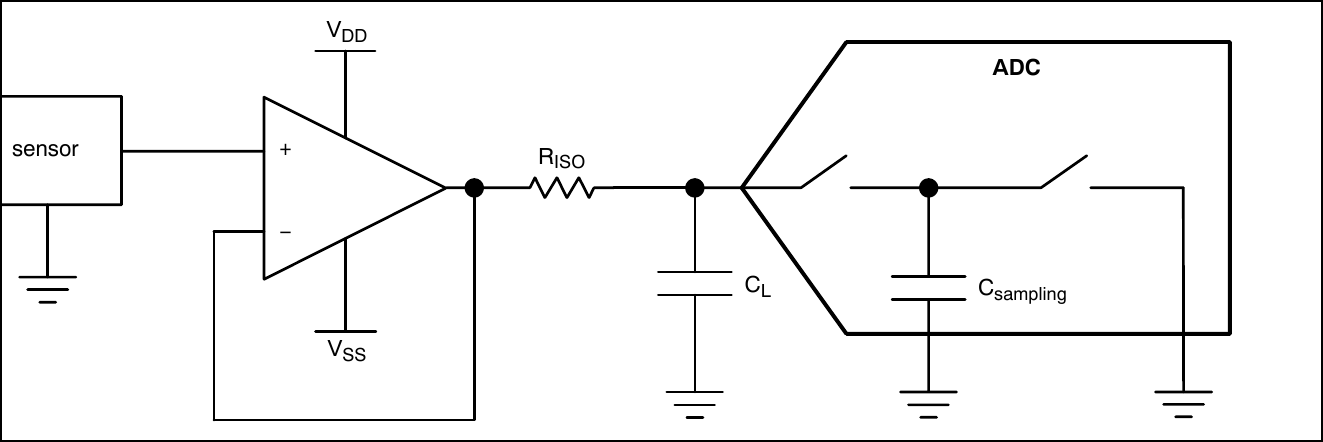

Processing completed!


In [20]:
pdf_file = '/content/ncs2.pdf'
output_folder = '/content/ncs2_circuits'
CE.get_all_circuit(pdf_file,output_folder)


**Test Datasheet 2**

Converting /content/pdf2.pdf to images...
The document only discusses one integrated circuit: the Texas Instruments THS4561. Here are its key features:

General:

 Description: Low-Power, High Supply Range, 60-MHz, Fully Differential Amplifier
 Supply Voltage: 2.85 V to 12.6 V
 Supply Current: 775 µA

Performance:

 Bandwidth: 60 MHz (G = 1 V/V)
 Slew Rate: 230 V/µs
 Gain Bandwidth Product: 68 MHz
 Voltage Noise: 
     1/f Voltage Noise Corner: 8 Hz
     Broadband Noise (≥ 500 Hz): 4 nV/√Hz
 Input Offset: ±250 µV (Maximum)
 Input Offset Drift: ±4 µV/°C (Maximum)
 Harmonic Distortion:
     HD2: -117 dBc at 2 Vpp, 100 kHz
     HD3: -124 dBc at 2 Vpp, 100 kHz
 Settling Time (0.01%, 2-V Step): 90 ns

Features:

 Negative Rail Input (NRI)
 Rail-to-Rail Output (RRO)

Packaging:

 VSSOP (8)
 WQFN (10)
 VQFN (16)
Circuits detected on page 19.
Displaying cropped image for page 19, circuit 1:


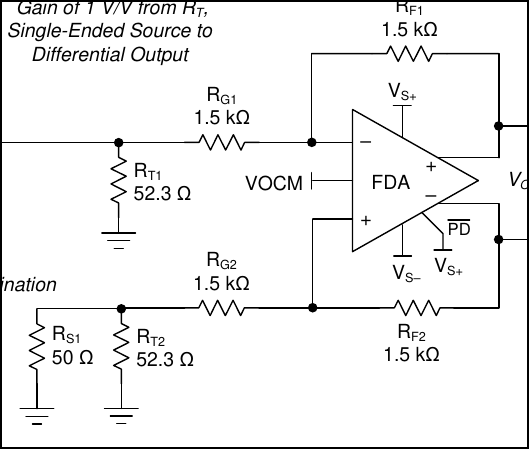

Circuits detected on page 20.
Displaying cropped image for page 20, circuit 1:


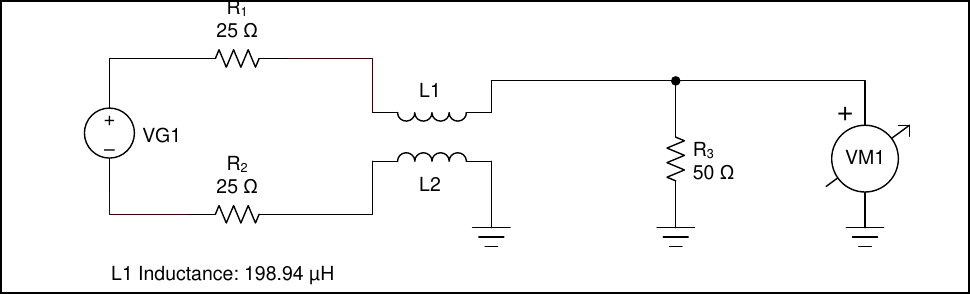

Circuits detected on page 21.
Displaying cropped image for page 21, circuit 1:


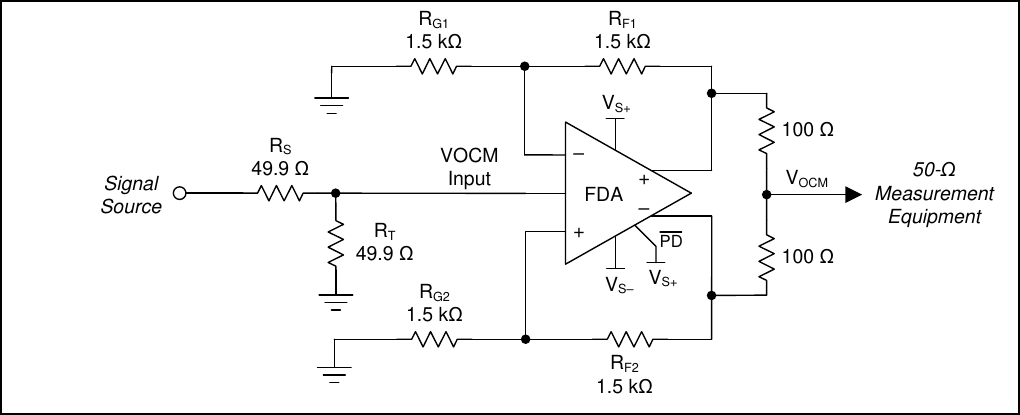

Circuits detected on page 24.
Displaying cropped image for page 24, circuit 1:


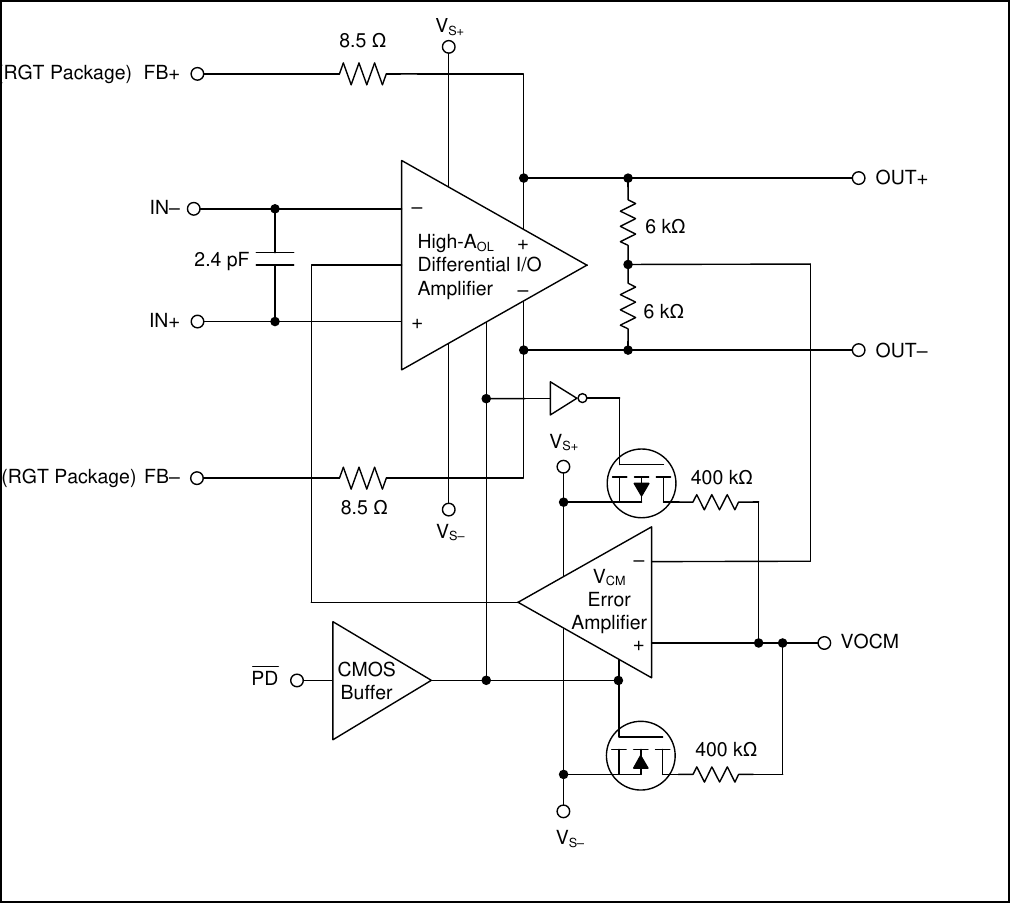

Circuits detected on page 27.
Displaying cropped image for page 27, circuit 1:


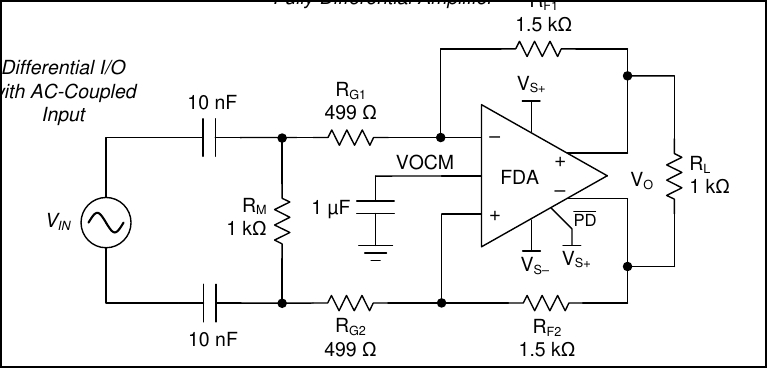

Circuits detected on page 29.
Displaying cropped image for page 29, circuit 1:


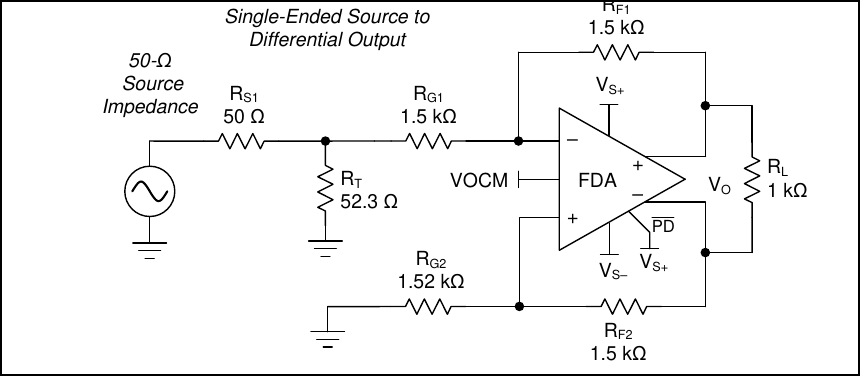

Circuits detected on page 31.
Displaying cropped image for page 31, circuit 1:


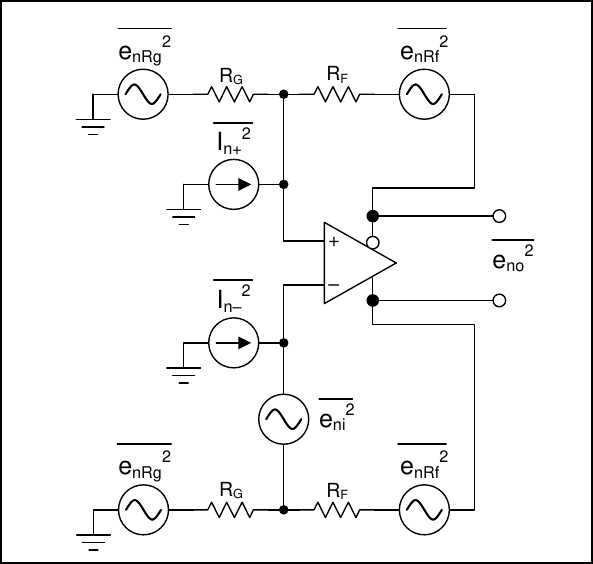

Circuits detected on page 33.
Displaying cropped image for page 33, circuit 1:


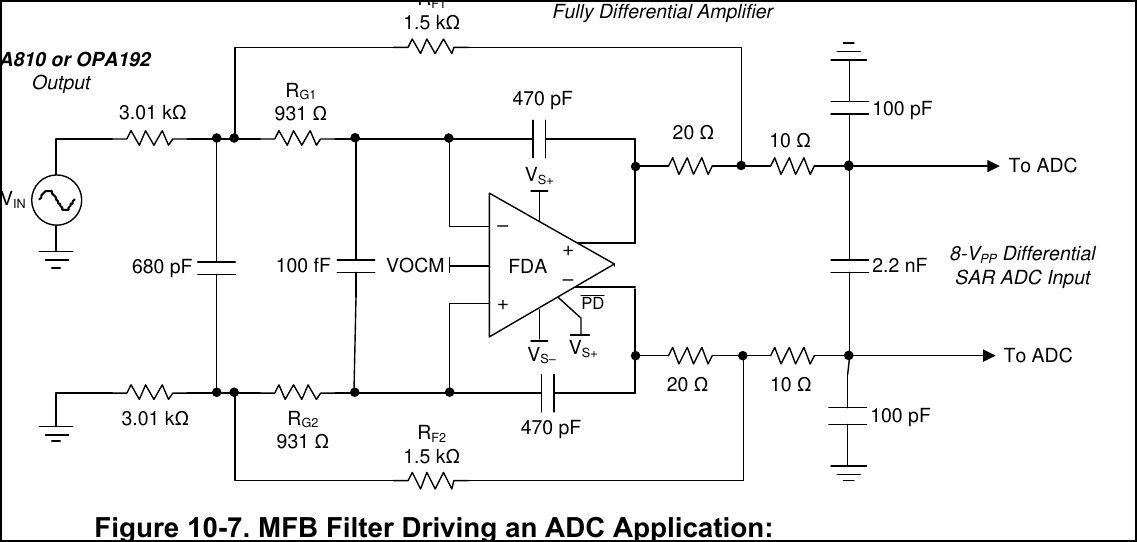

Circuits detected on page 35.
Displaying cropped image for page 35, circuit 1:


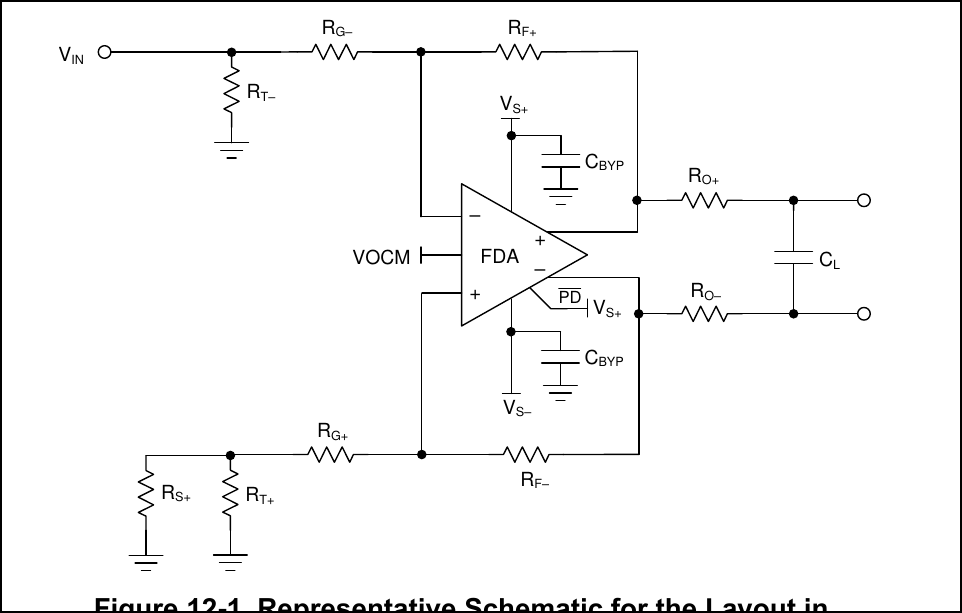

Circuits detected on page 36.
Displaying cropped image for page 36, circuit 1:


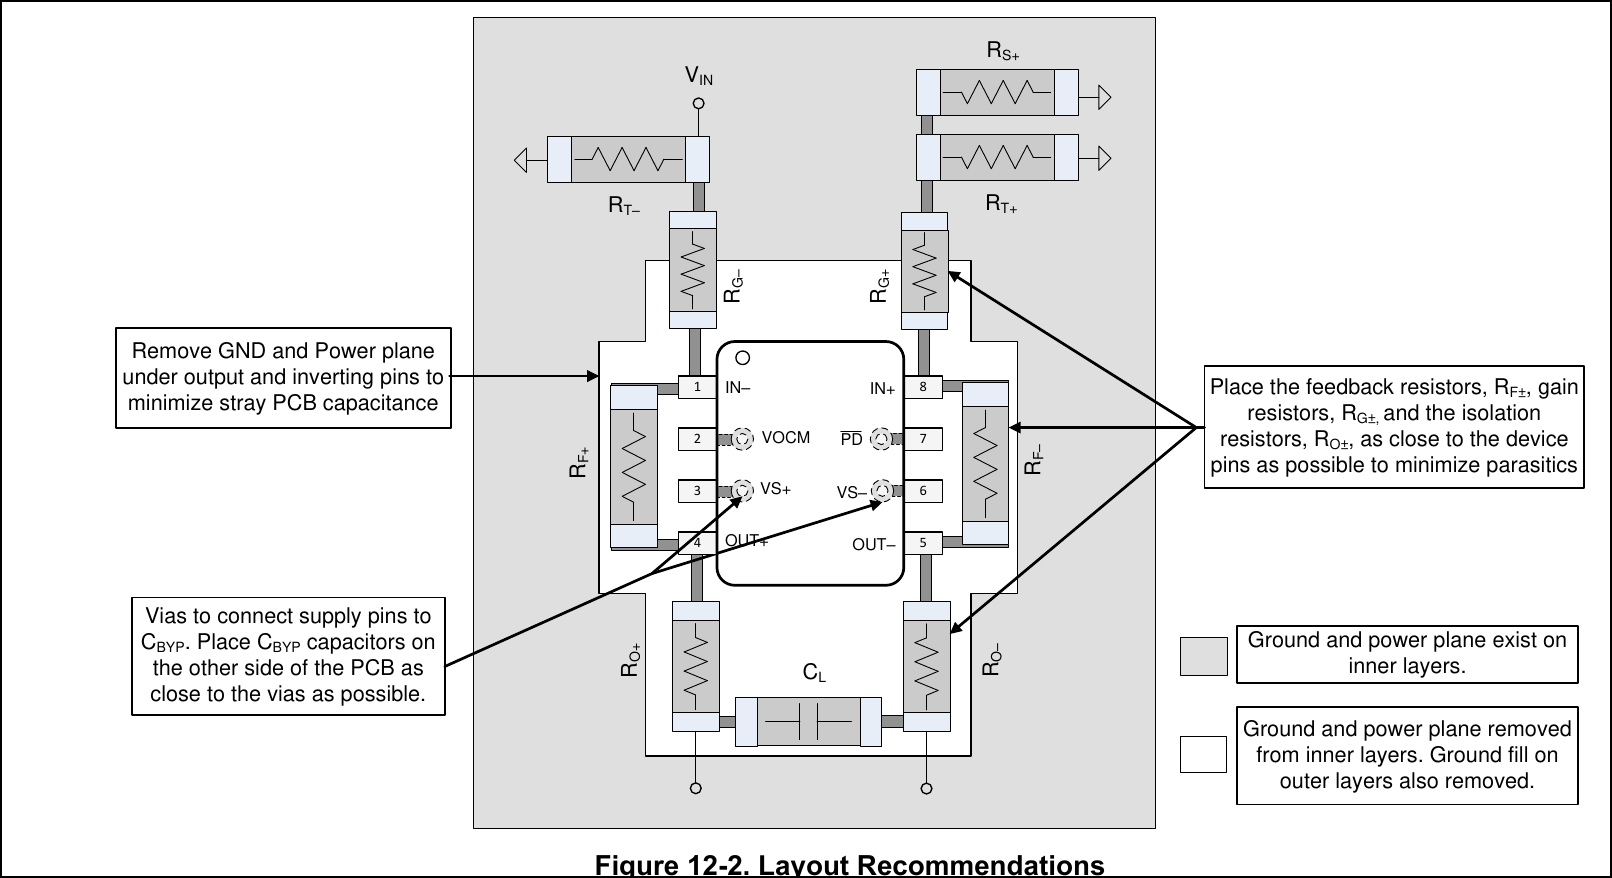

Processing completed!


In [21]:
pdf_file = '/content/pdf2.pdf'
output_folder = '/content/pdf2_circuits'
CE.get_all_circuit(pdf_file,output_folder)

**Single Page**

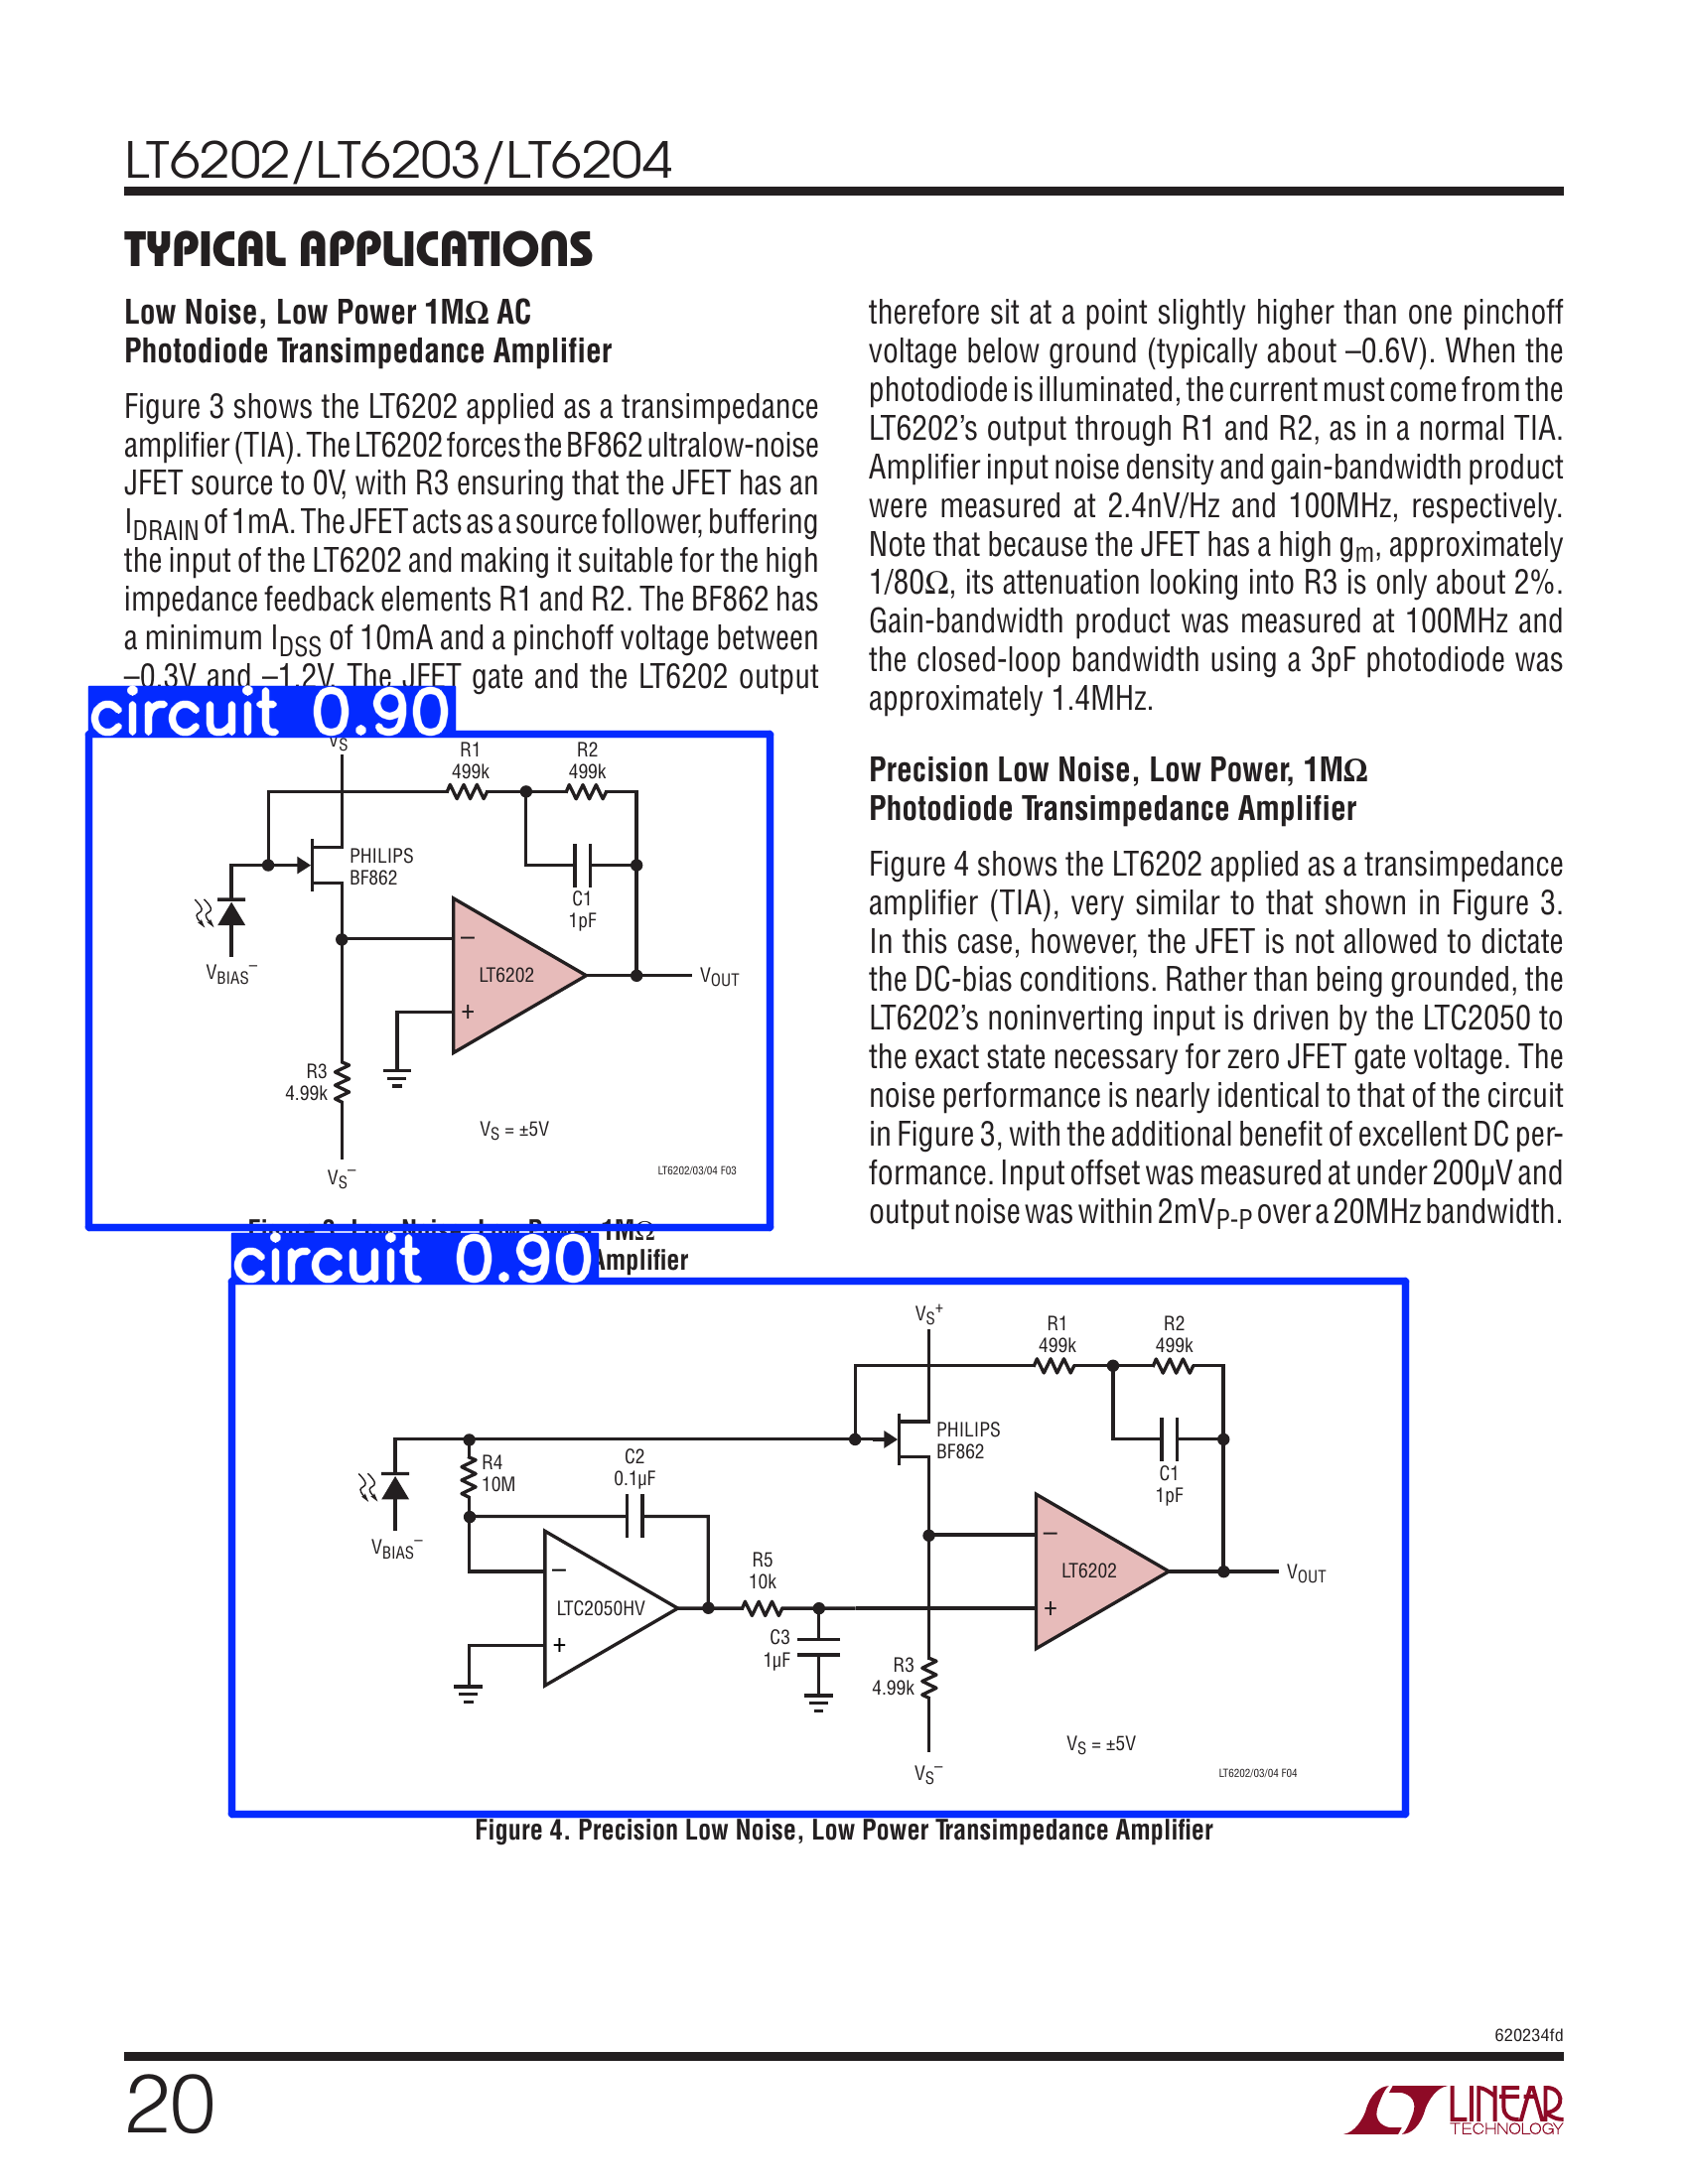

In [12]:
image_path='/content/page_119.png'
CE.get_circuit(image_path)